# Data exploration

In this notebook, data given by kaggle will be studied in order to create a strategy to process them before used 
by the models.

## Importing libraries

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Open files

Let's define the files path and open them with pandas csv reader.

In [2]:
data_dir = '../data'
train_path = os.path.join(data_dir,'train.csv')
test_path = os.path.join(data_dir, 'test.csv')

In [3]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

## Training dataset exploration

Let's see how training data is stored in the csv.


In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
classes = train_data['label'].unique()

print(f'---------TRAIN DATASET---------')
print(f'Nº of examples: {train_data.shape[0]}')
print(f'Number of labels: {len(classes)}')
print(f'Number of pixels: {train_data.shape[1] - 1}')

---------TRAIN DATASET---------
Nº of examples: 42000
Number of labels: 10
Number of pixels: 784


It seems that pixel info is written in different columns and label is just the first column. From this, I can think in 2 options:

- Treat images as vectors and construct a fully connected NN. Since images are not very big (28x28), this aproach is reasonable. For big inputs, it can lead to memory problems.

- Transform pixel values to 28x28 matrices and use CNN.

### Exploring an image

Let's see how images are build.

In [7]:
row = train_data.iloc[0]
img = row[train_data.columns[1:]].to_numpy(dtype=np.int16).reshape((28,28))
img_tag = row['label']

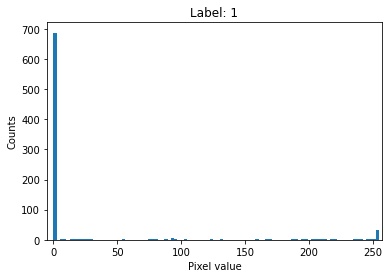

In [8]:
#Plotting the histogram
plt.figure()
plt.hist(img.flatten(), bins=100)
plt.xlim(-5,257)
plt.xlabel('Pixel value')
plt.ylabel('Counts')
plt.title(f'Label: {img_tag}')
plt.show()


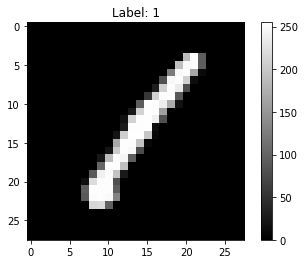

In [9]:
plt.figure()
plt.title(f'Label: {img_tag}')
plt.imshow(img, cmap='gray')
plt.colorbar()



## Test dataset exploration

Let's see how test data is stored in the csv.


In [10]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print(f'----------TEST DATASET----------')
print(f'Number of examples: {test_data.shape[0]}')

----------TEST DATASET----------
Number of examples: 28000
